# Simulated data analysis and figure generation for: "Optimization of SNV calling"
#### Written by: Kate Johnson

## This notebook generates the following figures for the manuscript: 
- Figures: 1A and 2B
- Supp. Figures: 1B, 2, 3A, 3B, 4A, and 4B

## Required inputs to run notebook: 

### Working directory path

### Path to R functions: 
  - maf_functions.R

### Golden files for each virus: 
  - H1N1-7_agitated_thompson_af_data.csv
  - H3N2-4_thirsty_volta_af_data.csv
  - Vic-3_fervent_raman_af_data.csv
  - SARS-CoV2-3_kickass_mcclintock_af_data.csv
  
  
### Metadata outlining the size of the segments/genome for each virus: 
  - SegmentSize.maf.csv

### Portions of the code that the user will have to change are highlighted with "USER WILL NEED TO UPDATE" comments.

In [1]:
# load necessary packages
library('plyr')
library('dplyr')
library('tidyverse')
library('ggplot2')
library('glue')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks

## Input simulated SNV reports

In [2]:
binocheck = 'allBino'
info = 'all'

In [3]:
message("set working directory and file names")

wkdir = "../reports/double_reports/"
setwd(wkdir) 

h1n1_af_report = 'H1N1-7_agitated_thompson_af_data.csv' # h1n1
h3n2_af_report = 'H3N2-4_thirsty_volta_af_data.csv' # h3n2
vict_af_report = 'Vic-3_fervent_raman_af_data.csv' # h3n2
sars_af_report  = 'SARS-CoV2-3_kickass_mcclintock_af_data.csv'


segment_sizes = '../../metadata/SegmentSize.maf.csv'  # USER WILL NEED TO UPDATE PATH TO METADATA

set working directory and file names



In [4]:
source(glue('../../scripts/maf_functions.R'))  # USER WILL NEED TO UPDATE PATH TO FUNCTIONS

In [5]:
message("Set working directory and read in sim data")


sizes = read.csv(segment_sizes,header = T)

# input the golden files:
# adding a one after af because we are using mx data now too
h1n1_af1 = read.csv(h1n1_af_report,header = T)
h3n2_af1 = read.csv(h3n2_af_report,header = T)
vict_af1 = read.csv(vict_af_report,header = T)
sars_af1 = read.csv(sars_af_report, header = T)

Set working directory and read in sim data



In [6]:
# USER MAY WANT TO UPDATE WHERE FIGURES ARE SAVED
if (!dir.exists(glue("../double_report_figures"))) {
      dir.create(glue("../double_report_figures"))
    } 

FIG_DIR = glue("../double_report_figures")
print(FIG_DIR)

../double_report_figures


# Prepping 'golden' simulated data
- Filtering for either rep 1 or merged data
- Extracting name information
- Rearranging
- Adding strain information for each virus

In [7]:
message("Adding 'strain' information to each df")
h1n1_af1$strain = 'H1N1'
h3n2_af1$strain = 'H3N2'
vict_af1$strain = 'VICT'
sars_af1$strain = 'SARS'
sars_af1$chrom = 'SARS_SARS'

Adding 'strain' information to each df



In [8]:
sars_af = rearrange_output_data(df = sars_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

sars_mix = rearrange_output_data(df = sars_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'mx' & parameter2 != 'filtered') %>%
        unique()

In [9]:
h1n1_af = rearrange_output_data(df = h1n1_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()


h1n1_mix = rearrange_output_data(df = h1n1_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'mix' & parameter2 != 'filtered') %>%
        unique()

In [10]:
h3n2_af = rearrange_output_data(df = h3n2_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

h3n2_mix = rearrange_output_data(df = h3n2_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'mix' & parameter2 != 'filtered') %>%
        unique()

In [11]:
vict_af = rearrange_output_data(df = vict_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'm1' & parameter2 != 'filtered') %>%
        unique()

vict_mix = rearrange_output_data(df = vict_af1, 
                            readsim_cov = 100000, 
                            id_list = id_list) %>%
            filter(rep == 'mx' & parameter2 != 'filtered') %>%
        unique()


## Combining rearranged data for A/H1N1, A/H3N2/ B/Victoria, and SARS-CoV-2 into one data frame to work with.
- Rbind dfs into one df
- Adding in variable information
- Renaming the Freebayes 'custom' as 'standard'
- Filtering out 'no-bino-check' timo data

In [12]:
# combine all virus dfs together, filter for the parameters that we want to look further into
vdf = rbind(h1n1_af, h3n2_af, vict_af, sars_af)

vdf_mix = rbind(h1n1_mix, h3n2_mix, vict_mix, sars_mix)

# we changed the 'standard' setting for freebayes to 'custom' and the 'custom' parameter for freebayes to 'standard'
vdf = vdf %>% 
    mutate(p = ifelse(tool == 'freebayes' & parameter == 'standard',
                      'custom', ifelse(tool == 'freebayes' & 
                                       parameter == 'custom',
                            'standard', parameter)))

vdf$parameter = vdf$p
vdf$tool_params = paste0(vdf$tool, '_', vdf$parameter,'_', vdf$parameter2)
vdf = vdf %>% filter(tool_params %in% all_tool_params)

# merged two replicate data: 
vdf_mix = vdf_mix %>% 
    mutate(p = ifelse(tool == 'freebayes' & parameter == 'standard',
                      'custom', ifelse(tool == 'freebayes' & 
                                       parameter == 'custom',
                            'standard', parameter)))

vdf_mix$parameter = vdf_mix$p
vdf_mix$tool_params = paste0(vdf_mix$tool, '_', vdf_mix$parameter,'_', vdf_mix$parameter2)
vdf_mix = vdf_mix %>% filter(tool_params %in% all_tool_params & parameter2 != 'no-binom-check')

In [13]:
message("Clean-up - remove data that will not be used later")
rm(h1n1_af, h3n2_af, vict_af, sars_af,
  h1n1_af1, h3n2_af1, vict_af1, sars_af1, 
  h1n1_mix, h3n2_mix, vict_mix, sars_mix)
gc()

Clean-up - remove data that will not be used later



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1229408,65.7,2.417852e+18,1.291272e+14,104193290,5564.6
Vcells,31683945,241.8,1.069875e+08,8.163000e+02,133463665,1018.3


# SUPP. FIGURE 1B: 

## The location and number of input simulated SNVs for A/H1N1, A/H3N2, B/Victoria, and SARS-CoV-2

In [14]:
message("Counting SNPs that were pulled for simulation:")

locate_input_snps = vdf %>% filter(af_golden > 0 ) %>%
                        select(chrom, pos, ref, alt, strain, 
                               segment, virus_type, rep) %>% unique()

locate_input_snps$virus_segment = paste0(locate_input_snps$virus_type, '_', locate_input_snps$segment)  # this is the name of the segment aligned to

locate_input_snps = merge(locate_input_snps, sizes, 
                         by.x=c('virus_segment'), by.y=c('segment'),
                         all.x=TRUE)

message("The total number of SNPs input for each strain:")

locate_input_snps %>% group_by(strain, virus_type, rep) %>% 
                            add_tally(name = 'NumberOfSNPs') %>% 
                            ungroup() %>% 
                        unique() %>% 
                    select(strain, NumberOfSNPs) %>% unique()


Counting SNPs that were pulled for simulation:

The total number of SNPs input for each strain:



strain,NumberOfSNPs
<chr>,<int>
H1N1,121
H3N2,110
SARS,144
VICT,118


Plotting location of input SNPs



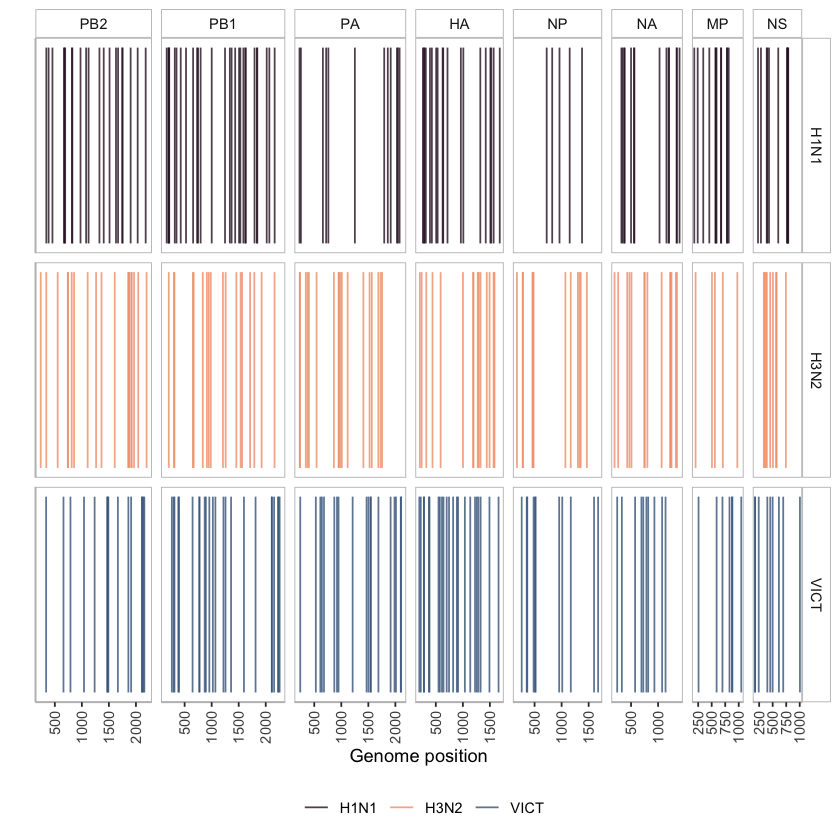

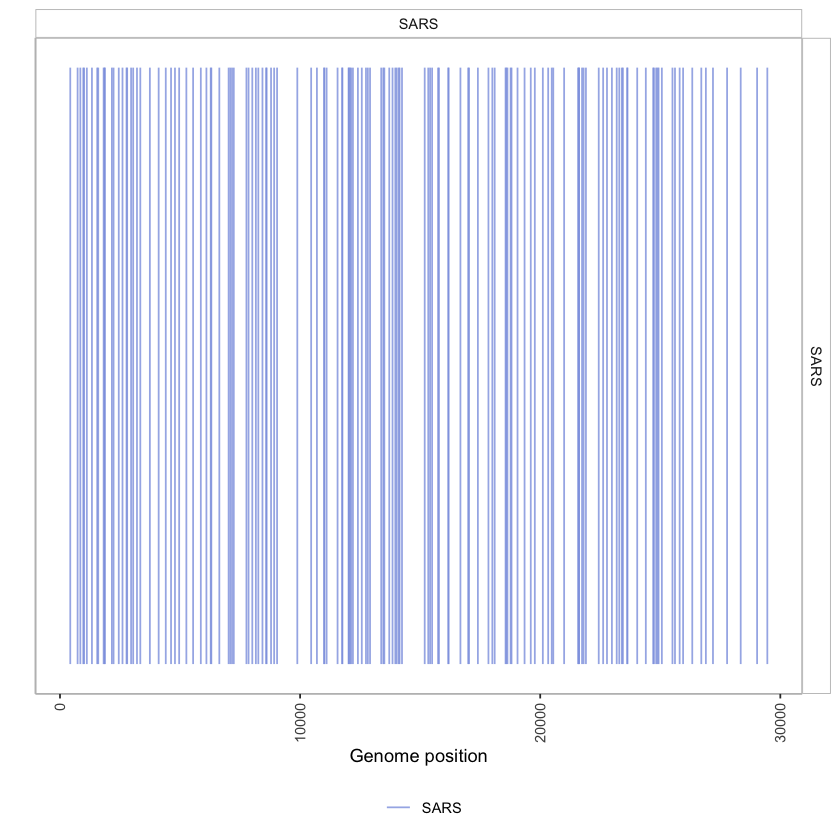

In [15]:
message("Plotting location of input SNPs")

locate_input_snps$segment = factor(locate_input_snps$segment, levels = CHROMS)  # rearrange

plots1b = ggplot(locate_input_snps %>% filter(strain != 'SARS'), aes(x= pos, y = 'snp', color = strain)) + 
            geom_segment(aes(x = pos, xend = pos, y=0, yend = 1), alpha = 0.8) + 
            facet_grid(strain~segment, scales = 'free_x', space = 'free_x') +
            ylab("") + 
            xlab("Genome position") + 
            strain_colScale + 
            theme(panel.background = element_blank(),
                      axis.line = element_line(colour = "gray"),
                      legend.key = element_blank(),
                      strip.background = element_rect(colour="gray", fill="white"),
                      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                        panel.border = element_rect(colour='gray', fill = NA),
                         axis.ticks.y = element_blank(),        
            axis.text.y = element_blank(), legend.position="bottom",
                  legend.title=element_blank())

print(plots1b)

ggsave(plots1b,
       filename = glue("{FIG_DIR}/figS1B_flu_kj.png"),
       width = 12,
       height = 3, limitsize=FALSE)

ggsave(plots1b,
       filename = glue("{FIG_DIR}/figS1B_flu_kj.pdf"),
       width = 12,
       height = 3, limitsize=FALSE, useDingbats = FALSE)


plots1b = ggplot(locate_input_snps %>% filter(strain == 'SARS'), aes(x= pos, y = 'snp', color = strain)) + 
            geom_segment(aes(x = pos, xend = pos, y=0, yend = 1),alpha = 0.8) + 
            facet_grid(strain~segment, scales = 'free_x', space = 'free_x') +
            ylab("") + 
            xlab("Genome position") + 
            strain_colScale + 
            theme(panel.background = element_blank(),
                      axis.line = element_line(colour = "gray"),
                      legend.key = element_blank(),
                      strip.background = element_rect(colour="gray", fill="white"),
                      axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                        panel.border = element_rect(colour='gray', fill = NA),
                         axis.ticks.y = element_blank(),        
            axis.text.y = element_blank(), legend.position="bottom",
                  legend.title=element_blank())

print(plots1b)

ggsave(plots1b,
       filename = glue("{FIG_DIR}/figS1B_sars_kj.png"),
       width = 12,
       height = 2, limitsize=FALSE)#, useDingbats = FALSE)

ggsave(plots1b,
       filename = glue("{FIG_DIR}/figS1B_sars_kj.pdf"),
       width = 12,
       height = 2, limitsize=FALSE, useDingbats = FALSE)

# Adding in false positive, true positive, and false negative information into the single replicate and two replicate data frames. 

In [16]:
message("Adding in FP, TP, and FN information")
# single replicate:
vdf = add_category_information(vdf)  # add tp, fp, fn, etc. 
vdf$strain = factor(vdf$strain, levels = strains)

# two replicate merged data
vdf_mix = add_category_information(vdf_mix)  # add tp, fp, fn, etc.

Adding in FP, TP, and FN information



## Applying frequency (freq_list) and coverage (cov_list) cutoffs to our single replicate simulated data to determine if cutoffs impact our false-discovery and false-negative rates.

- Filter for single replicate random data and the tool parameters that we are interested in (keep_tool_params)
- Using two for loops for the freq and coverage cutoffs, mark SNVs as TP, FP, FN, or TN depending on if they pass our cutoffs.
- If the output freq and read depth pass our cutoffs, and it was originally marked as a TP, keep it as a TP
- If the output freq and/or read depth pass our cutoffs and it was originally marked as a FP, keep it as FP
- If the ouput freq and/or read depth do *NOT* pass our cutoffs, and it was originally marked as a TP, mark it as a FN
- Else, if the output freq and/or read depth do *NOT* pass our cutoffs, and it was originally marked as a FP, mark it as TN
- Remove the original 'category' column


In [17]:
filt_vdf = vdf %>% filter(rep == 'm1' & allele_freq == 'random' & tool_params %in% keep_tool_params)

dim(filt_vdf)

freq_list = c(0, 0.01, 0.02, 0.03)

cov_list = c(0, 100, 200, 300)

vdf_filt = data.frame()

for(f in freq_list){
    
    for(c in cov_list){
        
        fv = filt_vdf %>%
                mutate(new_category = ifelse(af_workflow >= f & dp >= c & category == 'TP',
                                            "TP",
                                            ifelse(af_workflow < f & category == 'TP'| 
                                                   dp < c & category == 'TP',
                                                  "FN", 
                                                  ifelse(category == 'FN',
                                                        "FN", 
                                                        ifelse(category == 'FP' & af_workflow >= f & dp >= c,
                                                              "FP", "TN")))))
        
        fv$freq_cut = f
        
        fv$cov_cut = c
        
        vdf_filt = rbind(vdf_filt, fv)       
    }
}

vdf_filt$category = vdf_filt$new_category # make the 'category' column the 'new category' information!!

[1] 67459    24

In [18]:
vdf_mix$freq_cut = 0  # no cutoffs were used for the merged data, therefore marking it as 0 to make plotting easy
vdf_mix$cov_cut = 0 
vdf_mix = vdf_mix %>% filter(allele_freq == 'random' & rep == 'mx') %>% unique()
vdf_mix$new_category = vdf_mix$category

# Counting the number of true positive, false positive, and false negative SNVs in our single replicate datasets (not filtered and filtered). 

## This allows us to calculate other stats such as false negative rate, false discovery rate, and the F1 statistic.

- Group by tool, parameter, and simulation information
- Count the number of TP, FP, and FN SNVs
- Rearrange information into a useful format to work with

In [19]:
message("Counting FP, TP, FN, TN info")
vdf = vdf %>% ungroup()

group_colnames = c(c('coverage',
                     'category','strain',id_list))

count_df = vdf %>% group_by(across(all_of(group_colnames))) %>%
            add_tally(name = 'category_count') %>%
            ungroup() %>%
            select(all_of(c(group_colnames, 'category_count'))) %>%
            unique()

message("Adjust count df")

df = adjust_counts(count_df)

df = adjust_information_types(df)

Counting FP, TP, FN, TN info

Adjust count df



[1] "FP present - no adjustment needed"


In [ ]:
message("Category count for filt data")

vdf_filt = rbind(vdf_filt, vdf_mix) # combine the mx and m1 data (merged, and rep 1 data)

vdf_filt = vdf_filt %>% ungroup() %>% unique()

group_columns = c('coverage','category','strain',
                  'freq_cut','cov_cut', 'rep',
                  id_list)

count_filt = vdf_filt %>% 
            group_by(across(all_of(group_columns))) %>%
            add_tally(name = 'category_count') %>%
            ungroup() %>% 
            select(all_of(c(group_columns, 'category_count'))) %>%
            unique()


message("Adjust filtered count df")

df_filt = adjust_counts(count_filt)

df_filt = adjust_information_types(df_filt)

Category count for filt data



# Comparing output frequency to expected simulated frequency for true positive SNVs:

- Filter for true positive SNVs only in our standard, single replicate or merged data.
- Calculate the difference in frequency by taking the output freq and subtracting the expected freq of the SNV
- If the freqs are identical, then the difference will be 0, if the output is greater than the input, then the difference will be positive, if the output is lower than the input then the difference will be negative. 

In [ ]:
# Filtering for the true positives in rep 1 data: 
tp = vdf %>% filter(category == 'TP' & 
                   parameter == 'standard' &
                    !parameter2 %in% c('filtered','no-binom-check'))

tp$freq_difference = tp$af_workflow - tp$af_golden  # taking the output frequency and subtracting input

tp$coverage = as.numeric(as.character(tp$coverage))  # change the coverage column to a numeric

tp$coverage = factor(tp$coverage, levels = subsampling_depths)

tp_mix = vdf_mix %>% filter(category == 'TP' & 
                   parameter == 'standard' &
                    parameter2 != 'no-binom-check') 

tp_mix$freq_difference = tp_mix$af_workflow - tp_mix$af_golden

tp_mix$coverage = factor(tp_mix$coverage, levels = subsampling_depths)

### Calculate the mean and sd of the frequency difference between output and expected allele frequencies: 
- Filter the data using different coverage and frequency cutoffs for single and two replicate data
- Calculate the mean and sd frequency differences
- Prep for plotting

In [ ]:
select_it_list = c('category', 'tool', 'parameter', 
                   'parameter2', 'coverage')

# no filters, single replicate data
tp = tp %>%
        group_by(across(all_of(select_it_list))) %>%
        mutate(mean_freq_difference = mean(freq_difference),
               sd_freq_difference = sd(freq_difference)) %>%
        ungroup() 

tp0 = tp %>% select(all_of(c(select_it_list, 'mean_freq_difference','sd_freq_difference'))) %>%
        unique()

# Coverage >= 200x, freq >= 3%, single replicate data
tp23 = tp %>% 
            filter( dp >= 200 & af_workflow >= 0.03) %>% 
            group_by(across(all_of(select_it_list))) %>%
            mutate(mean_freq_difference = mean(freq_difference),
                   sd_freq_difference = sd(freq_difference)) %>%
            ungroup() %>%
            select(all_of(c(select_it_list, 'mean_freq_difference','sd_freq_difference'))) %>%
        unique()

# Coverage >= 300x, freq >= 2%, single replicate data
tp32 = tp %>% 
            filter( dp >= 300 & af_workflow >= 0.02) %>% 
            group_by(across(all_of(select_it_list))) %>%
            mutate(mean_freq_difference = mean(freq_difference),
                   sd_freq_difference = sd(freq_difference)) %>%
            ungroup() %>%
            select(all_of(c(select_it_list, 'mean_freq_difference','sd_freq_difference'))) %>%
        unique()


# Looking at the merged two replicate data: 
# Merged, two replicate data, no cutoffs
tpmix0 = tp_mix %>%
            group_by(across(all_of(select_it_list))) %>%
            mutate(mean_freq_difference = mean(freq_difference),
                   sd_freq_difference = sd(freq_difference)) %>%
        ungroup() %>% 
        select(all_of(c(select_it_list, 'mean_freq_difference','sd_freq_difference'))) %>%
    unique()

# Coverage >= 200x, freq >= 1%, merged two replicate data: 
tpmix12 = tp_mix %>% filter(af_workflow >= 0.01 & dp >= 200) %>% 
            group_by(across(all_of(select_it_list))) %>%
            mutate(mean_freq_difference = mean(freq_difference),
                   sd_freq_difference = sd(freq_difference)) %>%
        ungroup() %>% 
        select(all_of(c(select_it_list, 'mean_freq_difference','sd_freq_difference'))) %>%
    unique()



In [ ]:
# Plotting the frequency differences (mean and sd) for each downsampling fraction/tool
example_p = ggplot() + 

    geom_errorbar(data = tp0,
                  aes(x='1 rep, 0x, 0%',
                      ymin = mean_freq_difference - sd_freq_difference, 
                     ymax = mean_freq_difference + sd_freq_difference,
                          color =factor(as.numeric(as.character(coverage)))),
                      width = 0.5,
               position = position_dodge(width = 0.8)) + 

    geom_point(data = tp0 ,
              aes(x='1 rep, 0x, 0%', y = mean_freq_difference, 
                  color = factor(as.numeric(as.character(coverage))),
               group = factor(coverage)),
               position = position_dodge(width = 0.8)) + 

    geom_errorbar(data = tp23,
                  aes(x='1 rep, 200x, 3%',
                      ymin = mean_freq_difference - sd_freq_difference, 
                     ymax = mean_freq_difference + sd_freq_difference,
                          color =factor(as.numeric(as.character(coverage)))),
                      width = 0.5,
               position = position_dodge(width = 0.8)) + 

    geom_point(data = tp23,
              aes(x= '1 rep, 200x, 3%', y = mean_freq_difference, 
                  color = factor(as.numeric(as.character(coverage))),
              group = factor(coverage)),
             position = position_dodge(width = 0.8)) + 


    geom_errorbar(data = tp32,
                  aes(x='1 rep, 300x, 2%',
                      ymin = mean_freq_difference - sd_freq_difference, 
                     ymax = mean_freq_difference + sd_freq_difference,
                          color =factor(as.numeric(as.character(coverage)))),
                      width = 0.5,
               position = position_dodge(width = 0.8)) + 


    geom_point(data = tp32,
              aes(x= '1 rep, 300x, 2%', y = mean_freq_difference, 
                  color = factor(as.numeric(as.character(coverage))),
             group = factor(coverage)),
              position = position_dodge(width = 0.8)) + 
    

    geom_errorbar(data = tpmix0,
                  aes(x='2 reps, 0x, 0%',
                      ymin = mean_freq_difference - sd_freq_difference, 
                     ymax = mean_freq_difference + sd_freq_difference,
                          color =factor(as.numeric(as.character(coverage)))),
                      width = 0.5,
               position = position_dodge(width = 0.8)) + 


    geom_point(data = tpmix0,
              aes(x='2 reps, 0x, 0%',y=mean_freq_difference, 
                  color = factor(as.numeric(as.character(coverage))),
              group = factor(coverage)),
              position = position_dodge(width = 0.8)) + 


    geom_errorbar(data = tpmix12,
                  aes(x='2 reps, 200x, 1%',
                      ymin = mean_freq_difference - sd_freq_difference, 
                     ymax = mean_freq_difference + sd_freq_difference,
                          color =factor(as.numeric(as.character(coverage)))),
                      width = 0.5,
               position = position_dodge(width = 0.8)) + 

     geom_point(data = tpmix12,
              aes(x='2 reps, 200x, 1%',y=mean_freq_difference,
                  color = factor(as.numeric(as.character(coverage))),
              group = factor(coverage)),
              position = position_dodge(width = 0.8)) + 

    subsamp_colScale + 
    geom_hline(yintercept = 0.02, linetype = 3, color = 'black') + 
    geom_hline(yintercept = -0.02, linetype = 3, color = 'black') + 
    geom_hline(yintercept = 0, linetype = 2, color = 'black') + 
    labs(x="Cutoff type",y="Output freq - Expected freq") + 
    PlotTheme1 +
    facet_grid(.~tool)

print(example_p)

# Looking at freq, read depth and downsampling fraction of false positive SNVs: 
- Filter for standard, random, single replicate, false positive SNV data
- Plot output allele freq vs. read depth
- Plot output allele freq vs. downsampling fraction

In [ ]:
# filter for false positives in the random, standard, rep 1 data: 
fp_df = vdf %>% 
 filter(parameter == 'standard' &
        !parameter2 %in% c('filtered', 'no-binom-check') &
        allele_freq == 'random' &
        category == 'FP' & rep == 'm1') %>% 
    unique()

## Figure 2B panels: 
- allele freq vs. dp (1, 2, 3)
- allele freq vs. downsampling fraction (4, 5, 6)

In [ ]:
plot2b1 = ggplot(fp_df %>% filter(af_workflow <= 0.10), aes(x=af_workflow, y = dp, color = tool)) + 
    geom_point(alpha = 0.8, size = 2) + 
    caller_colScale +
    PlotTheme1 +
    geom_hline(yintercept = 200, linetype = 2, color = 'black') + 
    geom_vline(xintercept = 0.03, linetype = 2, color = 'black') + 
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'read depth')

ggsave(plot2b1,
       filename = glue("{FIG_DIR}/fig2B.1.dp_kj.png"),
       width = 4,
       height = 4, limitsize=FALSE)

ggsave(plot2b1,
       filename = glue("{FIG_DIR}/fig2B.1.dp_kj.pdf"),
       width = 4,
       height = 4, limitsize=FALSE, useDingbats = FALSE)

print(plot2b1)

plot2b2 = ggplot(fp_df %>% filter(af_workflow <= 0.10), aes(x=dp, fill = tool)) + 
    geom_histogram(binwidth = 500) + 
    caller_colScale_fill +
    PlotTheme1 +
    theme(legend.position = 'NONE') + 
    
    labs(x="read depth", y= "false positive count") +
    coord_flip() +
    scale_x_continuous(position = "top")

ggsave(plot2b2,
       filename = glue("{FIG_DIR}/fig2B.2.dp_kj.png"),
       width = 2,
       height = 4, limitsize=FALSE)

ggsave(plot2b2,
       filename = glue("{FIG_DIR}/fig2B.2.dp_kj.pdf"),
       width = 2,
       height = 4, limitsize=FALSE, useDingbats = FALSE)

print(plot2b2)


plot2b3 = ggplot(fp_df %>% filter(af_workflow <= 0.10) , aes(x=af_workflow, fill = tool)) + 
    geom_histogram(binwidth = 0.005) + 
    caller_colScale_fill +
    PlotTheme1 +
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'false positive count')+
    scale_x_continuous(position = "top")
   


ggsave(plot2b3,
       filename = glue("{FIG_DIR}/fig2B.3.dp_kj.png"),
       width = 4,
       height = 2, limitsize=FALSE)

ggsave(plot2b3,
       filename = glue("{FIG_DIR}/fig2B.3.dp_kj.pdf"),
       width = 4,
       height = 2, limitsize=FALSE, useDingbats = FALSE)

print(plot2b3)


In [ ]:
plot2b4 = ggplot(fp_df %>% filter(af_workflow <= 0.10), aes(x=af_workflow, y = as.numeric(as.character(coverage))/100000, color = tool)) + 
    geom_point(alpha = 0.8, size = 2) + 
    caller_colScale +
    PlotTheme1 +
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'downsampling fraction')

print(plot2b4)


plot2b5 = ggplot(fp_df %>% filter(af_workflow <= 0.10), aes(x=as.numeric(as.character(coverage))/100000, fill = tool)) + 
    geom_histogram(binwidth = 0.01) + 
    caller_colScale_fill +
    PlotTheme1 +
    theme(legend.position = 'NONE') + 
    labs(x="downsampling fraction", y='false positive count') + 
    coord_flip() +
    scale_x_continuous(position = "top")


print(plot2b5)

plot2b6 = ggplot(fp_df %>% filter(af_workflow <= 0.10), aes(x=af_workflow, fill = tool)) + 
    geom_histogram(binwidth = 0.005) + 
    caller_colScale_fill +
    PlotTheme1 +
    theme(legend.position = 'NONE') + 
    labs(x="allele frequency", y = 'false positive count')+
    scale_x_continuous(position = "top")

print(plot2b6)


## Compare FP and TP coverages

In [ ]:
cov_df = vdf %>% 
 filter(parameter == 'standard' &
        !parameter2 %in% c('filtered', 'no-binom-check') &
        allele_freq == 'random' &
        category %in% c('TP', 'FP') & rep == 'm1') %>% 
    unique()

colnames(cov_df)


# Compare how single replicate data with frequency/coverage cutoffs compares to two replicate data without cutoffs.

In [ ]:
message("Calculate means and sd for FNR and FDR")

# take filtered, single rep, data and calculate mean and sd for fdr and fnr
df_filt = df_filt %>% group_by(allele_freq, coverage,
                                 tool, parameter, parameter2, rep,
                                 freq_cut, cov_cut) %>%
            mutate(mean_fdr = mean(FDR), sd_fdr = sd(FDR),
                  mean_fnr = mean(FNR),sd_fnr = sd(FNR)) %>% 
            ungroup() %>% 
            unique() 


cust_params = c('mutect2_custom',"timo_custom",
                  "varscan_custom-1", "ivar_custom")

# reduce information for figures: 
fig_df = df_filt %>% 
    filter(tool_param %in% cust_params | parameter == 'standard') %>%
    filter(parameter2 != 'filtered' & 
           allele_freq == 'random') %>%
    select(tool, coverage, rep, strain, allele_freq, 
           mean_fnr, sd_fnr, mean_fdr,sd_fdr,
           cov_cut, freq_cut, parameter,tool_strain,FNR, FDR) %>%
    unique()

fig_df = fig_df %>% mutate(param_final = ifelse(parameter == 'standard', 'standard', 'custom'))  # change any custom-1 to custom

fig_df$strain = factor(fig_df$strain, levels = strains)  # reorder strain names

# reduce information for figures
fig_df_red = fig_df %>% select(tool, coverage, rep,
                               allele_freq, cov_cut, freq_cut, param_final,
                               mean_fnr, sd_fnr, mean_fdr, sd_fdr) %>% 
                unique()


# Supp. Figure 4B: FNR for each caller using FREQUENCY cutoffs

In [ ]:
supp_fig4b = ggplot() + 

    geom_line(data = fig_df_red %>% filter(cov_cut == 0 & 
                                           param_final == 'standard' & 
                                           rep == 'm1'),
              aes(x=factor(coverage), y = mean_fnr, 
                  color = tool, group = factor(freq_cut), 
                  linetype = factor(freq_cut)), position = position_dodge(width = 0.7), size = 1) + 

    geom_point(data = fig_df %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'm1'),
               aes(x=factor(coverage), 
                   y = FNR, color = tool, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5) + 

    geom_point(data = fig_df_red %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'm1'),
               aes(x=factor(coverage), 
                   y = mean_fnr, color = tool,
                  group = factor(freq_cut)), 
               size = 2, position = position_dodge(width = 0.7)) + 


    geom_line(data = fig_df_red %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'mx'),
              aes(x=factor(coverage), y = mean_fnr, 
                group = factor(freq_cut), 
                  linetype = factor(freq_cut)), position = position_dodge(width = 0.7), 
              size = 1, color = 'black',  alpha = 0.6) + 


    geom_point(data = fig_df %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'mx'),
               aes(x=factor(coverage), 
                   y = FNR, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5, color = 'black') + 

    geom_point(data = fig_df_red %>% filter(cov_cut == 0& param_final == 'standard' & rep == 'mx'),
               aes(x=factor(coverage), 
                   y = mean_fnr,
                  group = factor(freq_cut)), 
               size = 2, position = position_dodge(width = 0.7), color = 'black') + 

    PlotTheme1 + 
    caller_colScale + 
    scale_shape_manual(values = c(15,17,18,19)) + 
    xlab("Expected Coverage") + 
    ylab("FNR")  + 
    facet_grid(param_final + cov_cut ~ tool)  +
    theme(legend.position="bottom")


print(supp_fig4b)

ggsave(supp_fig4b,
       filename = glue("{FIG_DIR}/figS4B_kj.png"),
       width = 15,
       height = 5, limitsize=FALSE)

ggsave(supp_fig4b,
       filename = glue("{FIG_DIR}/figS4B_kj.pdf"),
       width = 15,
       height = 5, limitsize=FALSE, useDingbats = FALSE)




# Supp. Fig. 3B: FNR for each caller using COVERAGE cutoffs

In [ ]:
supp_3b = ggplot() + 

    geom_line(data = fig_df_red %>% filter(freq_cut == 0 & 
                                           param_final == 'standard' & 
                                           rep == 'm1'),
              aes(x=factor(coverage), y = mean_fnr, 
                  color = tool, group = factor(cov_cut), 
                  linetype = factor(cov_cut)), 
              position = position_dodge(width = 0.7), size = 1) + 

    geom_point(data = fig_df %>% filter(freq_cut == 0 & 
                                        param_final == 'standard' & 
                                        rep == 'm1'),
               aes(x=factor(coverage), 
                   y = FNR, color = tool, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5) + 

    geom_point(data = fig_df_red %>% filter(freq_cut == 0 & 
                                            param_final == 'standard' & 
                                            rep == 'm1'),
               aes(x=factor(coverage), 
                   y = mean_fnr, 
                   color = tool,
                  group = factor(cov_cut)), 
               size = 2, position = position_dodge(width = 0.7)) + 


    geom_line(data = fig_df_red %>% filter(freq_cut == 0 & 
                                           param_final == 'standard' & 
                                           rep == 'mx'),
              aes(x=factor(coverage), y = mean_fnr, 
                group = factor(cov_cut), 
                  linetype = factor(cov_cut)), 
              position = position_dodge(width = 0.7), 
              size = 1, color = 'black',  alpha = 0.6) + 


    geom_point(data = fig_df %>% filter(freq_cut == 0 & 
                                        param_final == 'standard' & 
                                        rep == 'mx'),
               aes(x=factor(coverage), 
                   y = FNR, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5, color = 'black') + 

    geom_point(data = fig_df_red %>% filter(freq_cut == 0 & 
                                            param_final == 'standard' & 
                                            rep == 'mx'),
               aes(x=factor(coverage), 
                   y = mean_fnr,
                  group = factor(cov_cut)), 
               size = 2, position = position_dodge(width = 0.7), color = 'black') + 

    PlotTheme1 + 
    caller_colScale + 
    scale_shape_manual(values = c(15,17,18,19)) + 
    xlab("Expected Coverage") + 
    ylab("FNR")  + 
    facet_grid(param_final + freq_cut ~ tool)  +
    theme(legend.position="bottom")

print(supp_3b)

ggsave(supp_3b,
       filename = glue("{FIG_DIR}/figS3B_kj.png"),
       width = 12,
       height = 4, limitsize=FALSE)

ggsave(supp_3b,
       filename = glue("{FIG_DIR}/figS3B_kj.pdf"),
       width = 12,
       height = 4, limitsize=FALSE, useDingbats = FALSE)


# Supp. Figure 4A: FDR for each caller using FREQUENCY cutoffs

In [ ]:
supp_fig4a = ggplot() + 
    
    geom_line(data = fig_df_red %>% filter(cov_cut == 0 & 
                                           param_final == 'standard' & rep == 'm1'),
              aes(x=factor(coverage), y = mean_fdr, 
                  color = tool, group = freq_cut, linetype=factor(freq_cut)), 
              position = position_dodge(width = 0.7), size = 1) + 

    geom_point(data = fig_df %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'm1'),
               aes(x=factor(coverage), y = FDR, 
                    color = tool, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5) + 

    geom_point(data = fig_df_red %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'm1'),
               aes(x=factor(coverage), 
                   y = mean_fdr, color = tool,
                  group = freq_cut), 
               size = 2, 
               position = position_dodge(width = 0.7), 
               alpha = 0.8) + 

     geom_line(data = fig_df_red %>% filter(cov_cut == 0 & 
                                           param_final == 'standard' & rep == 'mx'),
              aes(x=factor(coverage), y = mean_fdr, 
                  group = freq_cut, linetype=factor(freq_cut)), 
              position = position_dodge(width = 0.7), 
               size = 1, color = 'black') + 

    geom_point(data = fig_df %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'mx'),
               aes(x=factor(coverage), y = FDR, 
                    shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5, color = 'black') + 

    geom_point(data = fig_df_red %>% filter(cov_cut == 0 & param_final == 'standard' & rep == 'mx'),
               aes(x=factor(coverage), 
                   y = mean_fdr,
                  group = freq_cut), 
               size = 2, 
               position = position_dodge(width = 0.7), 
               alpha = 0.8, color = 'black') + 

    PlotTheme1 + 
    caller_colScale +
    xlab("Estimated Coverage") + 
    ylab("FDR") + 
    facet_grid(param_final  ~ tool) +            
    scale_shape_manual(values = c(15,17,18,19)) + 

    theme(legend.position="bottom")

print(supp_fig4a)

ggsave(supp_fig4a,
       filename = glue("{FIG_DIR}/figS4A_kj.png"),
       width = 15,
       height = 5, limitsize=FALSE)

ggsave(supp_fig4a,
       filename = glue("{FIG_DIR}/figS4A_kj.pdf"),
       width = 15,
       height = 5, limitsize=FALSE, useDingbats = FALSE)

# Supp. Figure 3A: FDR for each caller using COVERAGE cutoffs

In [ ]:
# supp for 3a
supp_3a = ggplot() + 
    

    geom_line(data = fig_df_red %>% filter(freq_cut == 0 & 
                                           param_final == 'standard' & rep == 'm1'),
              aes(x=factor(coverage), y = mean_fdr, 
                  color = tool, group = cov_cut, linetype=factor(cov_cut)), 
              position = position_dodge(width = 0.7), 
              size = 1) + 

    geom_point(data = fig_df %>% filter(freq_cut == 0 & param_final == 'standard' & rep == 'm1'),
               aes(x=factor(coverage), y = FDR, 
                    color = tool, shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5) + 

    geom_point(data = fig_df_red %>% filter(freq_cut == 0 & 
                                            param_final == 'standard' & 
                                            rep == 'm1'),
               aes(x=factor(coverage), 
                   y = mean_fdr, color = tool,
                  group = cov_cut), 
               size = 2, 
               position = position_dodge(width = 0.7), 
               alpha = 0.8) + 

     geom_line(data = fig_df_red %>% filter(freq_cut == 0 & 
                                           param_final == 'standard' & 
                                            rep == 'mx'),
              aes(x=factor(coverage), y = mean_fdr, 
                  group = cov_cut, linetype=factor(cov_cut)), 
              position = position_dodge(width = 0.7), 
               size = 1, color = 'black') + 

    geom_point(data = fig_df %>% filter(freq_cut == 0 & 
                                        param_final == 'standard' & 
                                        rep == 'mx'),
               aes(x=factor(coverage), y = FDR, 
                    shape = strain), 
               alpha = 0.2, position=position_dodge(width = 0.7), 
               size = 1.5, color = 'black') + 

    geom_point(data = fig_df_red %>% filter(freq_cut == 0 & 
                                            param_final == 'standard' & 
                                            rep == 'mx'),
               aes(x=factor(coverage), 
                   y = mean_fdr,
                  group = cov_cut), 
               size = 2, 
               position = position_dodge(width = 0.7), 
               alpha = 0.8, color = 'black') + 

    PlotTheme1 + 
    caller_colScale +
    xlab("Estimated Coverage") + 
    ylab("FDR") + 
    facet_grid(param_final + freq_cut  ~ tool) +            
    scale_shape_manual(values = c(15,17,18,19)) + 
    theme(legend.position="bottom")

print(supp_3a)

ggsave(supp_3a,
       filename = glue("{FIG_DIR}/figS3A_kj.png"),
       width = 12,
       height = 4, limitsize=FALSE)

ggsave(supp_3a,
       filename = glue("{FIG_DIR}/figS3A_kj.pdf"),
       width = 12,
       height = 4, limitsize=FALSE, useDingbats = FALSE)

# Figure 1A and Supp. Fig. 2
## Calculating F1 mean and SD across the four viruses for each tool, simulation type, and parameter set: 


#### Updated on 11.15.2022: 
- Removed 'random' points
- made x-axis numeric
- removed timo-no-binom-check as we do not use it in our paper
- removed 'standard' facet as it is also in figure 1A
- Added in ~ avg. coverage to the faceting


In [ ]:
df = df %>% group_by(allele_freq, coverage,
                     tool, parameter, parameter2) %>%
            mutate(mean_f1 = mean(F1), sd_f1 = sd(F1)) %>% 
            ungroup() %>% 
            unique() 

In [ ]:
df$parameter = str_replace(df$parameter, "custom-1", "custom")  # change the timo 'custom-1' to 'custom'
df$tool_params = paste0(df$tool,'_',df$parameter,'_',df$parameter2)

In [ ]:
# plotting MEAN of viruses

df$parameter = factor(df$parameter, levels = c('default','standard','custom'))

message("Ploting the F1 stat: 2*(PRECISION * RECALL/PRECISION + RECALL)")

message("2*(PPV X TPR)/(PPV + TPR)")

supp2 = ggplot(df %>% filter(
                         #parameter2 != 'filtered' &
                         #coverage <= 10000
                        !parameter2 %in% c('filtered','no-binom-check') &
                        allele_freq != 'random' &
                        parameter != 'standard' 
                        
                        
            )  %>%
               
               select(allele_freq, coverage, 
                       mean_f1, sd_f1, tool_params,
                       tool, parameter) %>% 
               unique() %>% 
               droplevels(), 

       aes(x = as.numeric(allele_freq), y = mean_f1, color = tool_params, 
           group = tool_params)) +
    
    geom_errorbar(
        aes(ymin = mean_f1 - sd_f1, ymax = mean_f1 + sd_f1)) + 

    geom_line(aes(group = tool_params),alpha = 0.8, size = 1) + 
    
    geom_point(alpha = 0.8, size = 2) + 
    theme_bw() +
    ylab('F1 statistic') +
    xlab("input SNV frequency (simulated data)") + 
    facet_grid(parameter~glue("{coverage/100000} ({coverage}x)")) +
    PlotTheme1 +
    adj_caller_colScale + 
    theme(legend.position="bottom")

print(supp2)

ggsave(supp2,
       filename = glue("{FIG_DIR}/figS2_kj.png"),
       width = 9,
       height = 6, limitsize=FALSE)

ggsave(supp2,
       filename = glue("{FIG_DIR}/figS2_kj.pdf"),
       width = 10,
       height = 6, limitsize=FALSE, useDingbats = FALSE)



In [ ]:
fig1a = df %>% filter(parameter == 'standard' & 
                         !parameter2 %in% c('filtered','no-binom-check') &
                        allele_freq != 'random')  %>%
                select(allele_freq, coverage, mean_f1, 
                       sd_f1, tool, parameter) %>% 
        unique() %>% droplevels() %>%


ggplot(., 
       aes(x = as.numeric(allele_freq), y = mean_f1, color = tool)) +
    geom_errorbar(
        aes(ymin = mean_f1 - sd_f1, ymax = mean_f1 + sd_f1)) + 
    geom_line(aes(group = tool),alpha = 0.8, size = 1) + 
    geom_point(alpha = 0.9, size = 2) + 
    theme_bw() +
    ylab('F1 statistic') +
    xlab("Input SNV frequency") + 
    facet_grid(.~glue("{coverage/100000} ({coverage}x)")) +
    PlotTheme1 +
    caller_colScale + 
    theme(legend.position="bottom")

print(fig1a)

ggsave(fig1a,
       filename = glue("{FIG_DIR}/fig1A_kj.png"),
       width = 10,
       height = 3.5, limitsize=FALSE)

ggsave(fig1a,
       filename = glue("{FIG_DIR}/fig1A_kj.pdf"),
       width = 10,
       height = 3.5, limitsize=FALSE, useDingbats = FALSE)


In [ ]:
sessionInfo()